Dataset shape: (569, 31)

Column names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Class distribution:
target
1    357
0    212
Name: count, dtype: int64


/tmp/ipython-input-3185547132.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_label', data=df, palette='pastel')


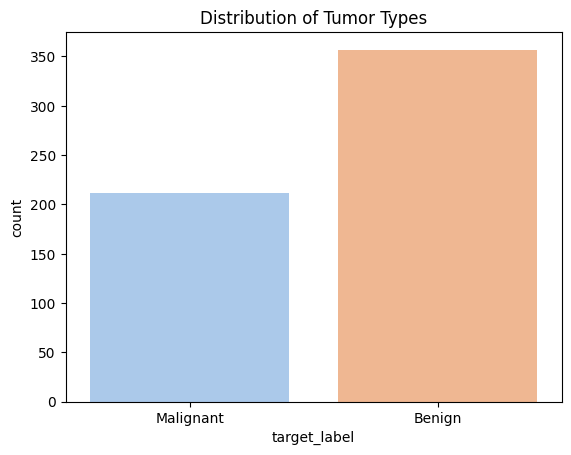

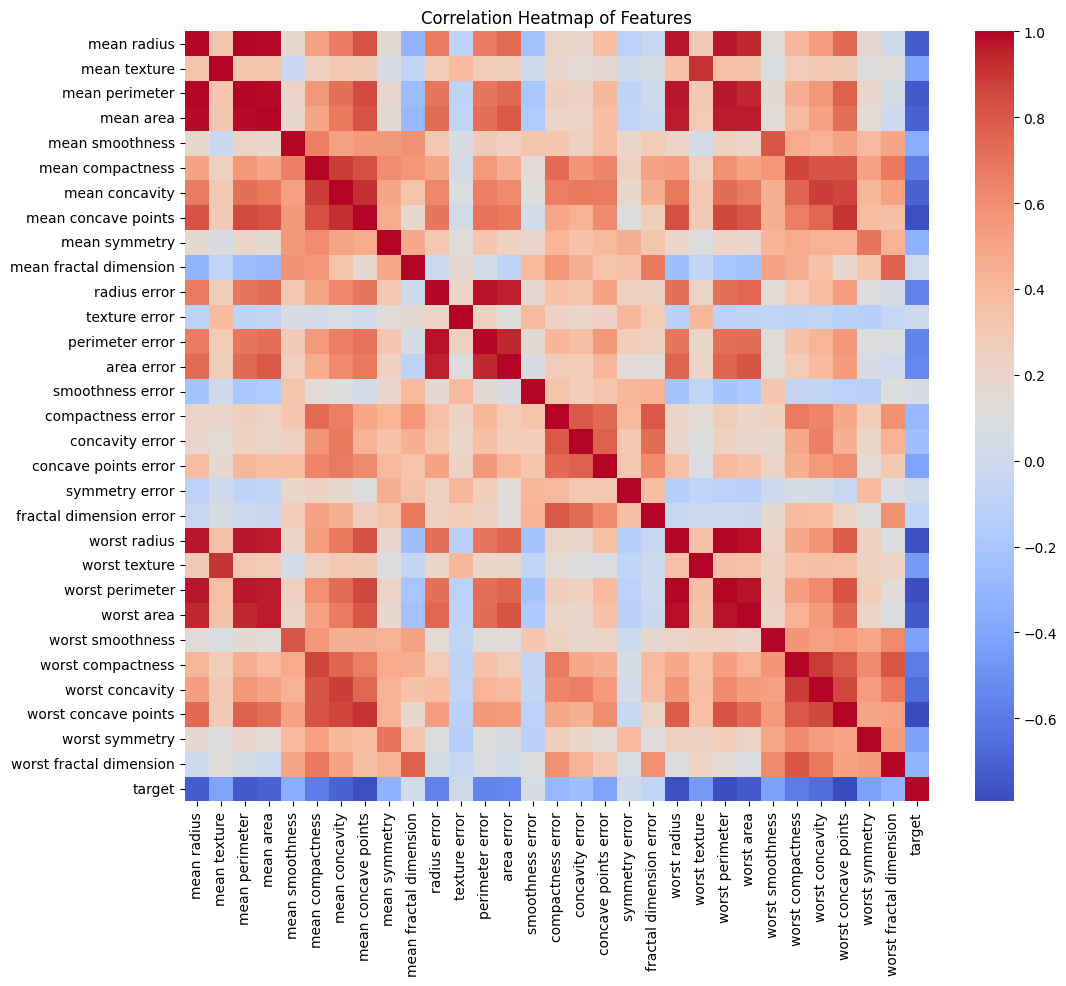

/tmp/ipython-input-3185547132.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_label', y='mean radius', data=df, palette='Set2')


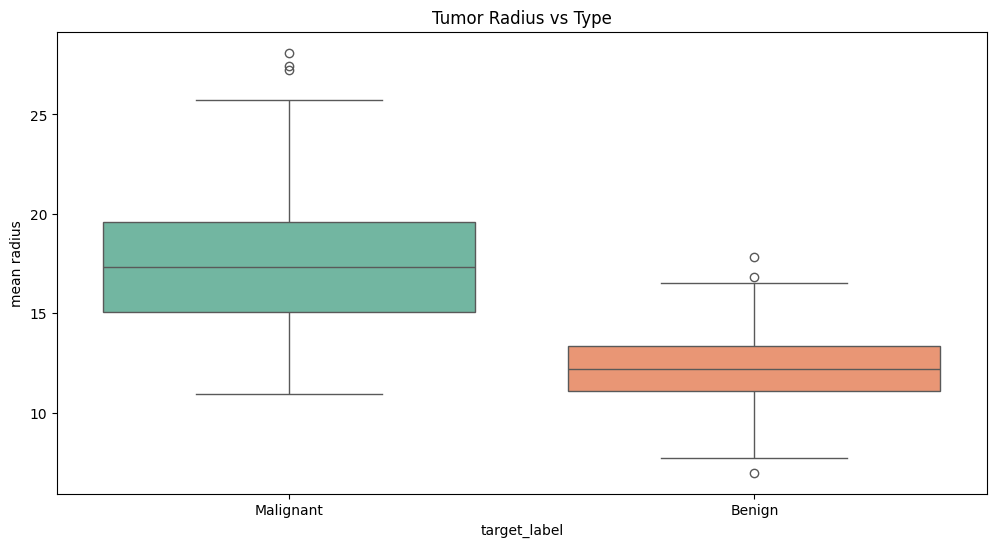

/tmp/ipython-input-3185547132.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_label', y='mean texture', data=df, palette='Set2')


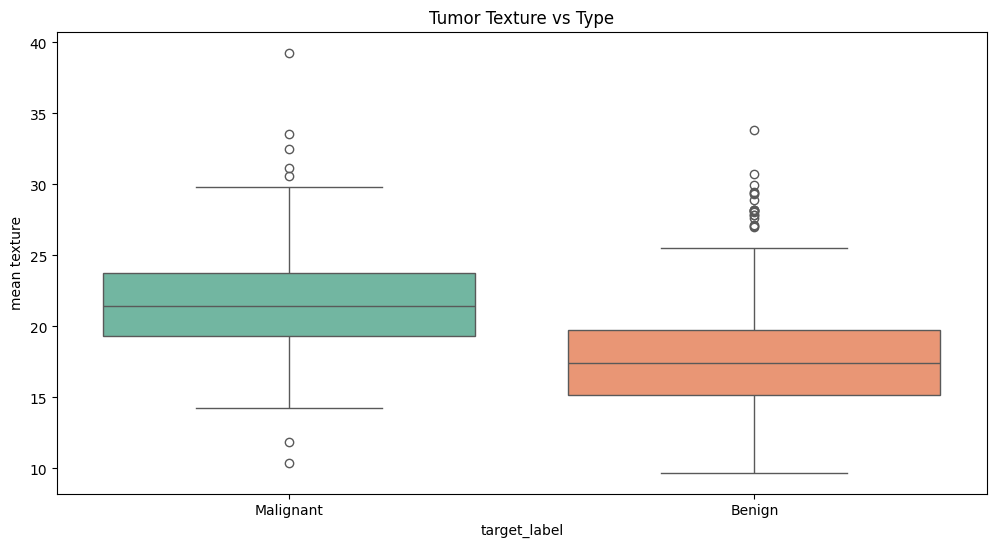

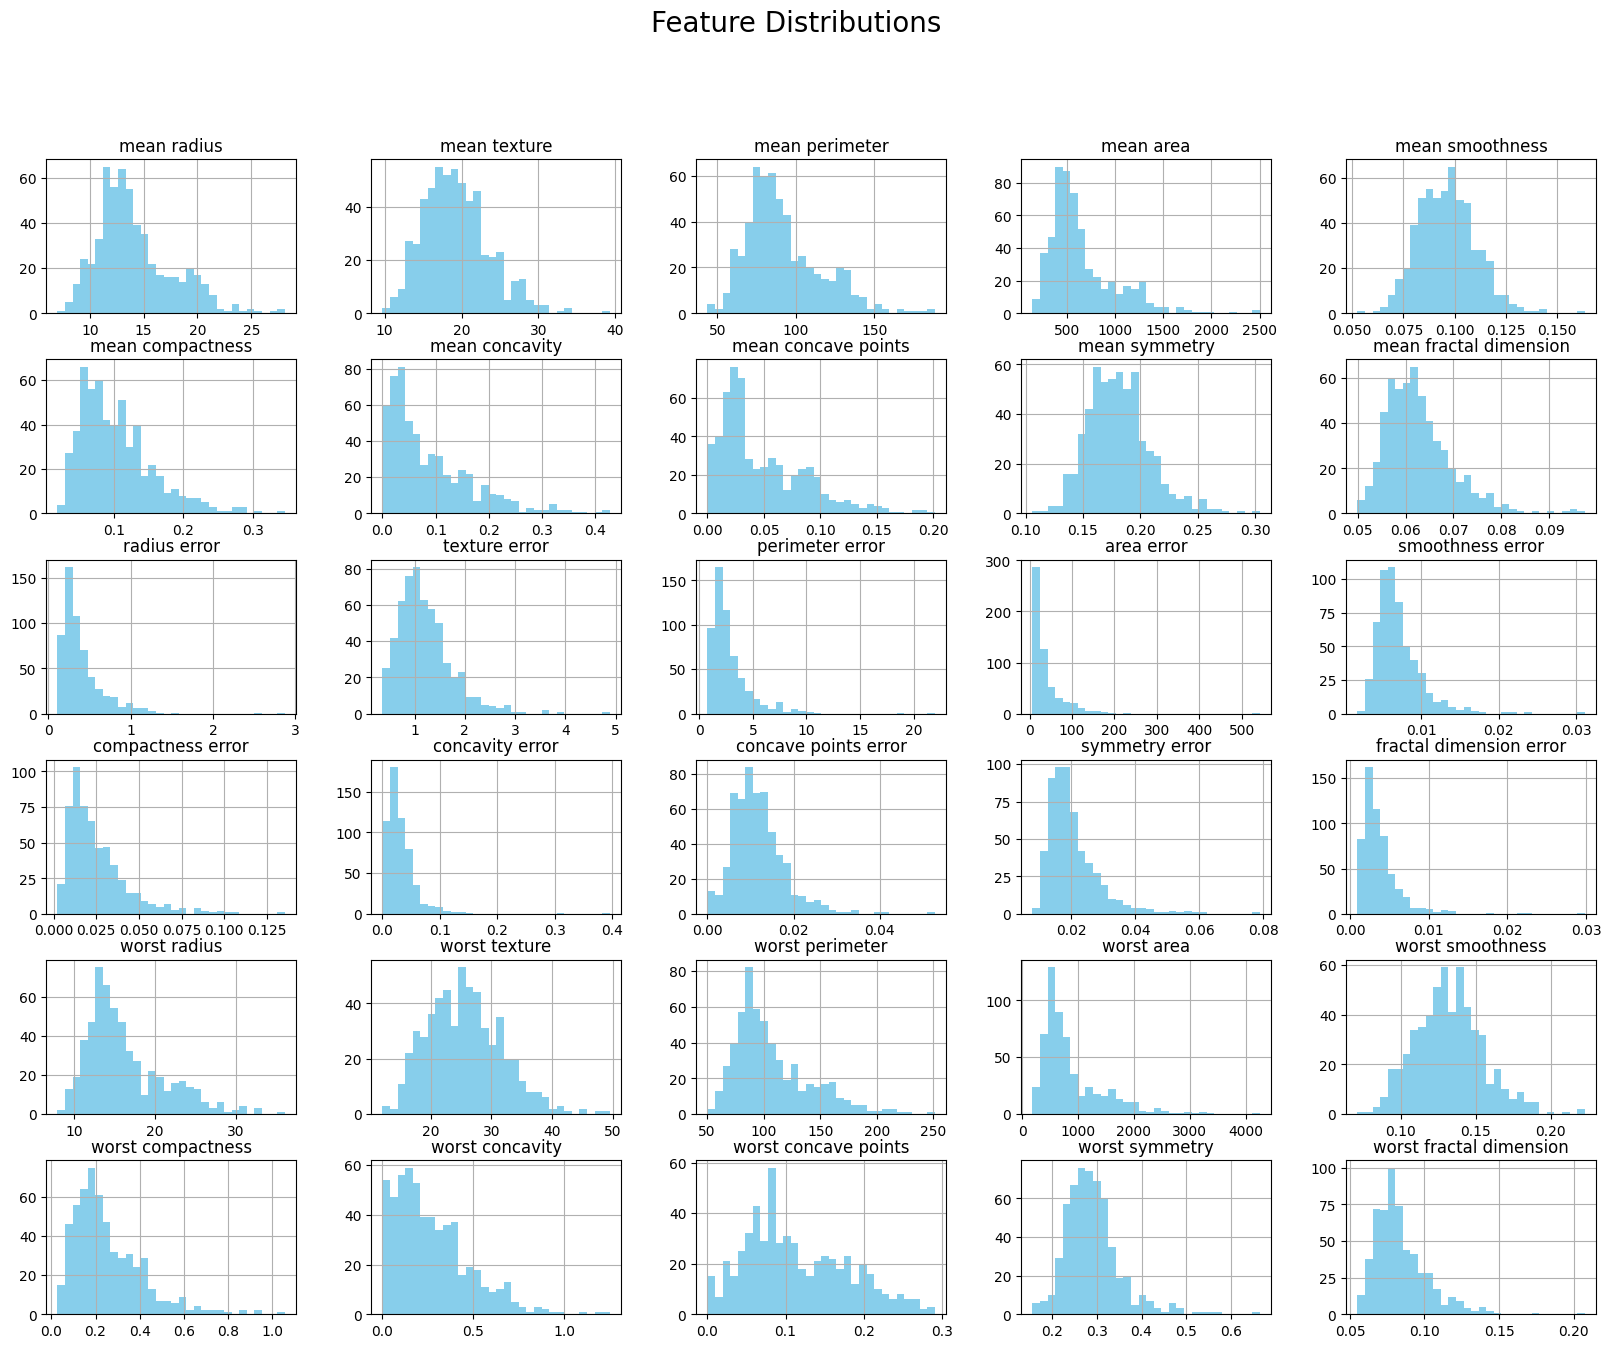

In [3]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset from sklearn
from sklearn.datasets import load_breast_cancer
# Load Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Features (X) and Target (y)
X = data.data
y = data.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Show first 5 rows
df.head()
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nClass distribution:")
print(df['target'].value_counts())

# Replace target values with labels
df['target_label'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
df['target_label'].value_counts()
# Statistical summary of features
df.describe().T
sns.countplot(x='target_label', data=df, palette='pastel')
plt.title("Distribution of Tumor Types")
plt.show()
plt.figure(figsize=(12,10))
sns.heatmap(df.drop('target_label', axis=1).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(x='target_label', y='mean radius', data=df, palette='Set2')
plt.title("Tumor Radius vs Type")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='target_label', y='mean texture', data=df, palette='Set2')
plt.title("Tumor Texture vs Type")
plt.show()
df.drop('target', axis=1).hist(bins=30, figsize=(20,15), color='skyblue')
plt.suptitle("Feature Distributions", size=20)
plt.show()

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Random Forest Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:20:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-3483482410.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="pastel")


XGBoost Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                 Model  Accuracy
0  Logistic Regression  0.964912
1        Random Forest  0.956140
2                  SVM  0.929825
3              XGBoost  0.956140


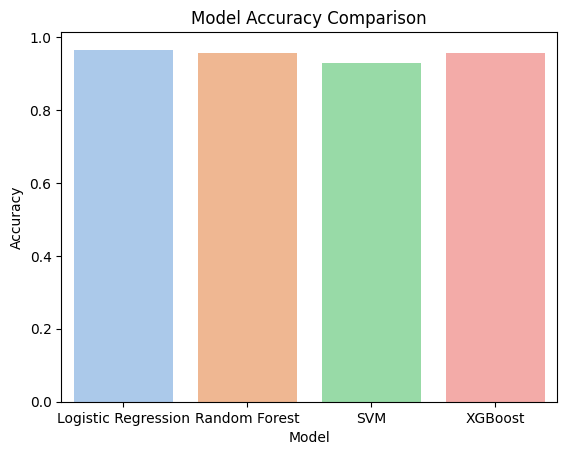

In [22]:
# =========================
# PHASE 2: Classical Machine Learning Models
# =========================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split dataset
X = df.drop(['target', 'target_label'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Dictionary to store results
results = {}

# -------------------------
# Logistic Regression
# -------------------------
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

# -------------------------
# Random Forest
# -------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results["Random Forest"] = accuracy_score(y_test, y_pred_rf)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# -------------------------
# Support Vector Machine
# -------------------------
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results["SVM"] = accuracy_score(y_test, y_pred_svm)

print("SVM Report:\n", classification_report(y_test, y_pred_svm))

# -------------------------
# XGBoost
# -------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
results["XGBoost"] = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

# -------------------------
# Model Comparison
# -------------------------
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

sns.barplot(x="Model", y="Accuracy", data=results_df, palette="pastel")
plt.title("Model Accuracy Comparison")
plt.show()


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4975 - loss: 79.2192 - val_accuracy: 0.3605 - val_loss: 31.5354
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4857 - loss: 51.1874 - val_accuracy: 0.3605 - val_loss: 18.3348
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4638 - loss: 32.2549 - val_accuracy: 0.3605 - val_loss: 12.8052
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5433 - loss: 26.5045 - val_accuracy: 0.3605 - val_loss: 9.2738
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4581 - loss: 26.8203 - val_accuracy: 0.3605 - val_loss: 8.4237
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5066 - loss: 18.1046 - val_accuracy: 0.3605 - val_loss: 4.7720
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5463 - loss: 15.8132 - val_accuracy: 0.4884 - val_loss: 1.2531
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5852 - loss: 10.7496 - val_accuracy: 0.6395 - val_loss

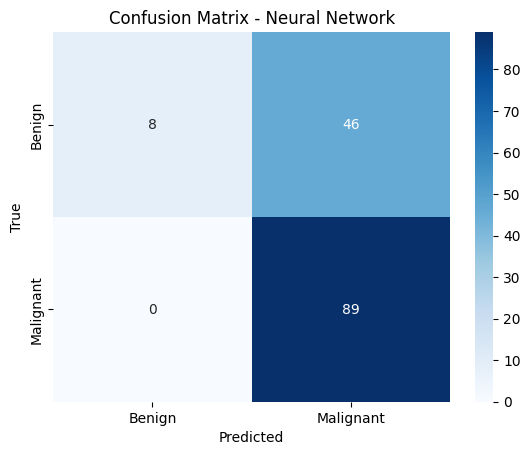


Sample Risk Scores:
   True_Label  Predicted_Label  Risk_Score_%
0           1                1     64.070000
1           0                1     50.630001
2           0                1     59.570000
3           1                1     64.059998
4           1                1     64.070000
5           0                1     56.259998
6           0                0     48.090000
7           0                1     61.340000
8           1                1     64.070000
9           1                1     64.070000

LIME Explanations for a few test instances:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Explanation for instance 0 (True Label: 1, Predicted Label: 1):
  520.70 < worst area <= 686.55: 0.0720
  16.18 < mean texture <= 18.69: -0.0088
  421.65 < mean area <= 545.65: -0.0081
  0.28 < worst symmetry <= 0.32: 0.0078
  0.32 < radius error <= 0.46: 0.0074
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Explanation for instance 1 (True Label: 0, Predicted Label: 1):
  worst area > 1030.75: -0.2

In [21]:
# =========================
# PHASE 3: Neural Network + Explainable AI + Risk Score
# =========================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas here if it's not imported globally
import numpy as np # Import numpy

# Import LIME
import lime
import lime.lime_tabular

# -------------------------
# 1. Build the Neural Network
# -------------------------
nn_model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")  # binary classification
])

nn_model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])

# -------------------------
# 2. Train the Model
# -------------------------
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# -------------------------
# 3. Evaluate on Test Set
# -------------------------
y_pred_probs = nn_model.predict(X_test).ravel()  # probabilities
y_pred = (y_pred_probs >= 0.5).astype(int)       # threshold 0.5

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Neural Network")
plt.show()

# -------------------------
# 4. Risk Index (0–100%)
# -------------------------
risk_scores = (y_pred_probs * 100).round(2)

risk_df = pd.DataFrame({
    "True_Label": y_test.values,
    "Predicted_Label": y_pred,
    "Risk_Score_%": risk_scores
})

print("\nSample Risk Scores:")
print(risk_df.head(10))

# -------------------------
# 5. Explainability with LIME
# -------------------------
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Malignant', 'Benign'],
    mode='classification'
)

# Function to get prediction probabilities for LIME
def predict_proba_nn(data):
    probabilities = nn_model.predict(data)
    # LIME expects probabilities for each class.
    # For binary classification with sigmoid output,
    # we can create a 2D array [prob_class_0, prob_class_1]
    return np.hstack((1 - probabilities, probabilities))


# Generate explanations for a few instances in the test set
print("\nLIME Explanations for a few test instances:")
for i in range(5): # Explain first 5 instances
    exp = explainer.explain_instance(
        data_row=X_test.iloc[i].values,
        predict_fn=predict_proba_nn,
        num_features=5 # Show top 5 features
    )
    print(f"\nExplanation for instance {i} (True Label: {y_test.iloc[i]}, Predicted Label: {y_pred[i]}):")
    for feature, weight in exp.as_list():
        print(f"  {feature}: {weight:.4f}")

In [19]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f1d9be5677bc92465486d4727e87c71d734d77baddc3578d967fd3f0b1eefd58
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [23]:
# Save trained neural network model
nn_model.save("nn_breast_cancer_model.h5")
